# Extracción de hojas frutales

## Proyecto final Visión artificial

### Integrantes:  
- Andrés Stevens Arrieta Muñoz
- Rafael Angel Casalins Hernandez
- Alejandro Jiménez Zapata
- Carlos Andrés Mena Tobón
- Carlos Eduardo Ordoñez Bolañoz
- Luciana Serna Palacio

## Introducción

Se propone este desarrollo por la necesidad existente en un grupo de investigación de la Facultad de Ciencias, de poder separar las hojas de otros elementos en imágenes tomadas, esto para poder facilitar el estudio de ciertas situaciones al contrastar con imágenes térmicas de la planta.  

Para este desarrollo se comienza a trabajar con un dataset basado en frutas, las cuales poseen una o varias hojas, con esto se puede empezar un tratamiento para asi poder extraer una hoja de una imagen, sin importar que otros elementos se encuentren en esta. 
El dataset tiene gran variedad de frutas, lo cual conlleva un gran cambio en todas las imágenes a tratar ya que existen cambios en los colores y formas de las frutas.

## Librerias:

Tratamiento de matrices:

In [50]:
import numpy as np

Tratamiento de archivos:

- Se utiliza para leer archivos y manipular rutas de almacenamiento

In [51]:
import os
from os import listdir

Tratamiento de imagenes:

- PIL permite la edicón de imagenes directo desde Python y soporta variedad de formatos. incluidos los mas usados como GIF, JPEG y NPG.

- Skimage es una colección de algoritmospara procesamiento de imagenes y visión por computadora.
- Skimage.io Lee, guarda, y muestra imagenes y video.
- Skimage.filters busca bordes y filtra rangos.
- Skimage.morphology usa operaciones morfologicas por ejemplo apertura o esqueletización.
- cv2 u opencv se usa para la detección de objetos en fotografias.

In [52]:
from PIL import Image
from skimage.io import imread
import skimage.filters as filters
import cv2
import skimage.morphology as morph
import skimage
import skimage.io

Generación de imagenes:

- matplotlib.pyplot es una libreria especializada en la creación de gráficos en dos dimensiones

- matploblib.image soporta carga de imagenes y reescalado

In [53]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

Especializados en imagenes de plantas:

- Plantcv en un paquete de software de analisis de código abierto destinado a la determinación del fenotipo de las plantas, se usó para crear imagenes binarias de bordes a partir de una imagen RGB o en escala de grises, utilizando un filtro cany de skimage,

In [54]:
from plantcv import plantcv as pcv

## Funciones miscelanias

Graficar imagenes:

In [55]:
def plot(imagen,color='black',title=None,cmapa='gray',pic = False,subplot  = (1,1,1),vmin = 0, vmax = 255):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = vmin, vmax = vmax)
    plt.title(title,color = color)

Conversión a escala de grises:

In [56]:
def load_gray_image(image_path):
    
    coloured_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return gray_image

Creación de histogramas

A cada imagem del Dataset se le realizó un histograma para realizar un analisis de color y asi obtener un threshold

In [57]:
def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])

Threshold:

In [58]:
def threshold(img,tipo,t):
    _ , image = cv2.threshold(img,t,255,tipo)
    lista = {0:'THRESH_BINARY',
             1:'THRESH_BINARY_INV',
             2:'THRESH_TRUNC',
             3:'THRESH_TOZERO',
             4:'THRESH_TOZERO_INV',
             8:'THRESH_OTSU',
             16:'THRESH_TRIANGLE',
             7:'THRESH_MASK'    }
    plot(image, pic = True,subplot = (1,2,2),title = 'Imagen binarizada con tipo de umbralización {}.'.format(lista[tipo]))
    plot(img,subplot = (1,2,1), title= f'Imagen filtrada')
    return _

## Espacio de color RGB:

Escala de grises para imagenes del dataset:

Lo primero que se hace es convertir las imagenes del canal BGR a RGB para asi evitar confusiones, y luego ya mostramos la imagen en la escala de grises.

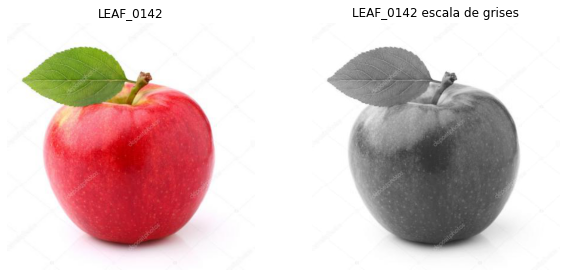

In [59]:
## Comprobamos las funciones de importacion y gráficar
imagen = '0142'
carpeta = 'DataSet'
img_test = cv2.cvtColor(cv2.imread(f'{carpeta}/datatrain/LEAF_{imagen}.jpg'), cv2.COLOR_BGR2RGB)
img_gray = load_gray_image(f'{carpeta}/datatrain/LEAF_{imagen}.jpg')
plt.figure(figsize=(10,10))
plot(img_test,subplot=(2,2,1) ,title=f'LEAF_{imagen}')
plot(img_gray,subplot=(2,2,2) ,title=f'LEAF_{imagen} escala de grises')

Vectores de color RGB:

In [60]:
# Rojo
abc_r = (1,0,0)
# Verde
abc_g = (0,1,0)
# Azul
abc_b = (0,0,1)

files = listdir('DataSet/datatrain')

Creación de imagenes en espacios RGB del dataset:

In [61]:
print(files[0:20])
for name in files:
    img_or = cv2.cvtColor(cv2.imread(f'DataSet/datatrain/{name}'), cv2.COLOR_BGR2RGB)
    imagen_r = np.dot(img_or,abc_r)
    imagen_g = np.dot(img_or,abc_g)
    imagen_b = np.dot(img_or,abc_b)
    cv2.imwrite(f'DataSet/Canales/R/{name}',imagen_r)
    cv2.imwrite(f'DataSet/Canales/G/{name}',imagen_g)
    cv2.imwrite(f'DataSet/Canales/B/{name}',imagen_b)

['LEAF_0127.jpg', 'LEAF_0142.jpg', 'LEAF_0157.jpg', 'LEAF_0196.jpg', 'LEAF_0220.jpg', 'LEAF_0258.jpg', 'LEAF_0289.jpg', 'LEAF_0313.jpg', 'LEAF_0422.jpg', 'LEAF_0450.jpg', 'LEAF_0459.jpg', 'LEAF_0465.jpg', 'LEAF_0480.jpg', 'LEAF_0489.jpg', 'LEAF_0547.jpg', 'LEAF_0559.jpg', 'LEAF_0577.jpg', 'LEAF_0721.jpg', 'LEAF_0788.jpg', 'LEAF_0812.jpg']


Resultado de separación en muestras de color:

Separamos las imagenes en cada plano de color (rojo, verde y azul)

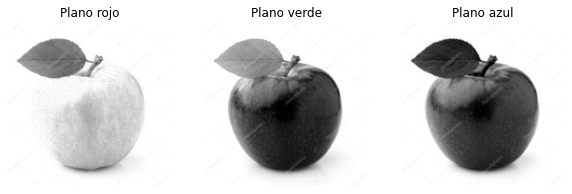

In [62]:
## Se separan las imagenes en cada canal del espacio de color 
imagen_r = np.dot(img_test,abc_r)
imagen_g = np.dot(img_test,abc_g)
imagen_b = np.dot(img_test,abc_b)

plt.figure(figsize=(10,10))

plot(imagen_r,subplot=(1,3,1),title="Plano rojo")

plot(imagen_g, subplot=(1,3,2),title="Plano verde")

plot(imagen_b, subplot=(1,3,3) , title="Plano azul")

Creación de histogramas de imagenes en el dataset:

In [63]:
for name in files[0:30]:
        img_or = cv2.imread(f'DataSet/datatrain/{name}')
        plot_img_hist(img_or,f'{name}',1,2,1,10,5)
        plt.savefig(f'DataSet/Histograms/{name}')
        plt.close()

Resultado de histogramas de imagenes en el dataset:

Presentamos el histograma de una imagen para apreciar mejor los datos que este nos arroja

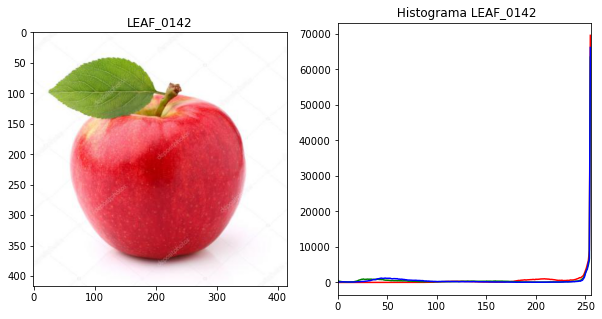

In [64]:
plot_img_hist(img_test,f'LEAF_{imagen}',1,2,1,10,5)

## Binarización:

Se realiza la binarización a partir de una imagen en escala de grises respecto a un umbral determinado.

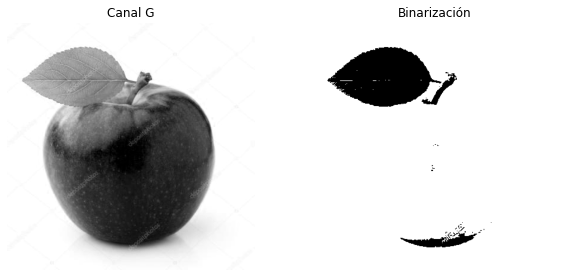

In [65]:
def binary(image, umbral):
     binary = np.zeros((len(image), len(image[0])))
     for i in range(len(image)):
          for j in range(len(image[0])):
               if(image[i,j] <= umbral):
                    binary[i,j] = 0

               else:
                    binary[i,j] = 255

     return binary

plt.figure(figsize=(10,10))
plot(imagen_g,subplot=(2,2,1) ,title='Canal G')
plot(binary(imagen_r, 165),subplot=(2,2,2) ,title='Binarización')

Se desarrolla una función para eliminar los colores más oscuros y otra para aplicar binarización en múltiples canales simultaneamente.

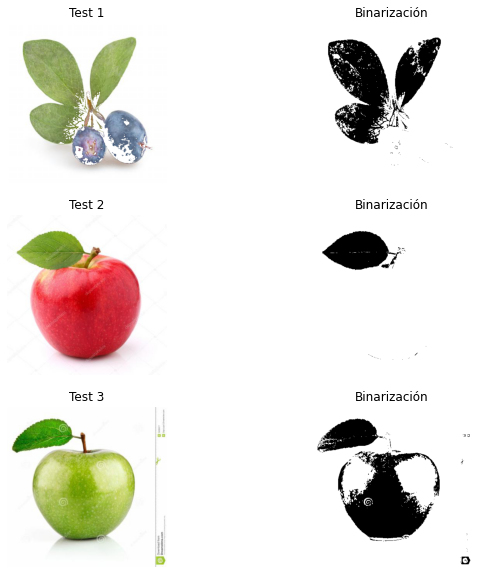

In [66]:
#Función para binarizar con condiciones en cada canal 
def binaryChannels(image, umbralR, umbralG, umbralB, mayorR = False, mayorG = False, mayorB = False):
     binary = np.zeros((len(image), len(image[0])))

     imagen_r = np.dot(image,abc_r)
     imagen_g = np.dot(image,abc_g)
     imagen_b = np.dot(image,abc_b)

     for i in range(len(image)):
          for j in range(len(image[0])):
               conditionR = imagen_r[i,j] <= umbralR
               conditionG = imagen_g[i,j] <= umbralG
               conditionB = imagen_b[i,j] <= umbralB
               if(mayorR):
                    conditionR = not conditionR
               if(mayorG):
                    conditionG = not conditionG
               if(mayorB):
                    conditionB = not conditionB

               if(conditionR and conditionG and conditionB):
                    binary[i,j] = 0

               else:
                    binary[i,j] = 255

     return binary
     
#Función para eliminar los colores con tendencia al negro
def removeLesses(imagen, lessNumber):
     imagen_r = np.dot(imagen,abc_r)
     imagen_g = np.dot(imagen,abc_g)
     imagen_b = np.dot(imagen,abc_b)

     aux = np.empty_like(imagen) 
  
     aux[:] = imagen

     for i in range(len(imagen)):
          for j in range(len(imagen[0])):
               if((imagen_r[i,j] <= lessNumber) and (imagen_g[i,j] <= lessNumber) and (imagen_b[i,j] <= lessNumber) ):
                    aux[i,j,0] = 255
                    aux[i,j,1] = 255
                    aux[i,j,2] = 255
     return aux
img_test2 = cv2.cvtColor(cv2.imread(f'{carpeta}/datatrain/LEAF_0812.jpg'), cv2.COLOR_BGR2RGB)
img_test4 = cv2.cvtColor(cv2.imread(f'{carpeta}/datatrain/LEAF_0196.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
img_test3 = removeLesses(img_test,0)
img_test2 = removeLesses(img_test2,120)
plot(img_test2,subplot=(3,2,1) ,title='Test 1')
plot(binaryChannels(img_test2, 179, 105, 113, mayorG= True),subplot=(3,2,2) ,title='Binarización')

plot(img_test3,subplot=(3,2,3) ,title='Test 2')
plot(binaryChannels(img_test3, 179, 105, 113, mayorG= True),subplot=(3,2,4) ,title='Binarización')

plot(img_test4,subplot=(3,2,5) ,title='Test 3')
plot(binaryChannels(img_test4, 179, 105, 113, mayorG= True),subplot=(3,2,6) ,title='Binarización')

## Detección de bordes y creación de mascara

Con el animo de generar de una mascara que abarcara los objetos dentro de las imagenes, se creo una una función que halla los bordes los objetos y luego los rellena para generar la mascara.

Para la detección de los bordes se hizo uso de una función de PlantCV llamada canny_edge_detect, basada en OpenCV.

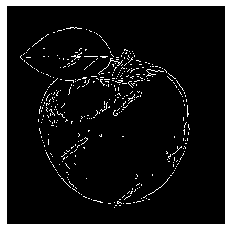

In [67]:
#img = plt.imread('DataSet/datatrain/LEAF_0480.jpg')
edges2 = pcv.canny_edge_detect(img=img_test, high_thresh=60, low_thresh =40, sigma=1)
plt.imshow(edges2, interpolation='nearest', cmap='gray')
plt.axis('off')
plt.show()

Luego se utilizó la función de cierre para mejorar la definición de los bordes de cada imagen:

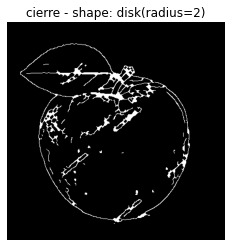

In [68]:
radius = 2
selem = morph.disk(radius)
cierre = morph.binary_closing(edges2,selem)

fig, ax2 = plt.subplots()
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
plt.axis('off')
ax2.imshow(cierre, cmap='gray')

Luego se realizaron dilataciones sobre las imagen detección de bordes para generar una mascara.

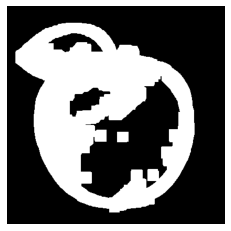

In [69]:
elem1 = morph.rectangle(3,3)
elem2 = morph.disk(3)
    
dilatacionx1 = morph.binary_dilation(cierre,elem1)
dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)
dilatacionx4 = morph.binary_dilation(dilatacionx3,elem1)
dilatacionx5 = morph.binary_dilation(dilatacionx4,elem1)
dilatacionx6 = morph.binary_dilation(dilatacionx5,elem1)
dilatacionx7 = morph.binary_dilation(dilatacionx6,elem1)
dilatacionx8 = morph.binary_dilation(dilatacionx7,elem1)
dilatacionx9 = morph.binary_dilation(dilatacionx8,elem1)

filled = morph.remove_small_holes(dilatacionx9,area_threshold=1500)
plt.axis('off')
plt.imshow(filled, cmap='gray')

Finalmente, se concatenaron las funciones anteriores para generar las mascaras correspondientes:

In [70]:
def mask_creator(path):
    #direccion de la imagen
    img = plt.imread(path)
    
    #deteccion d bordes
    #edges = pcv.canny_edge_detect(img)
    edges2 = pcv.canny_edge_detect(img=img, high_thresh=60, low_thresh =40, sigma=1)
    
    #cierre de bordes
    radius = 2
    selem = morph.disk(radius)
    cierre = morph.binary_closing(edges2,selem)
    
    #dilatacion
    elem1 = morph.rectangle(3,3)
    elem2 = morph.disk(3)
    
    dilatacionx1 = morph.binary_dilation(cierre,elem1)
    dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
    dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)
    dilatacionx4 = morph.binary_dilation(dilatacionx3,elem1)
    dilatacionx5 = morph.binary_dilation(dilatacionx4,elem1)
    dilatacionx6 = morph.binary_dilation(dilatacionx5,elem1)
    dilatacionx7 = morph.binary_dilation(dilatacionx6,elem1)
    dilatacionx8 = morph.binary_dilation(dilatacionx7,elem1)
    dilatacionx9 = morph.binary_dilation(dilatacionx8,elem1)
    
    filled = morph.remove_small_holes(dilatacionx3,area_threshold=3000) #min_size es el area en pixeles de los huecos a rellenar
    #fig, ax2 = plt.subplots()
    plt.axis('off')
    plt.imshow(filled, cmap='gray')
    #return filled

## Mácaras para las imagenes

Se consideran 3 tipos de máscaras, una de ellas se desarrolla a partir de la detección de bordes, la siguiente mediante binarización en varios canales y finalmente se realizan correcciones a través de transformaciones morfologicas.

Inicialmente se desarrolla una función para generar una primera máscara a través de la detección de bordes en la imagen, mostra anteriormente (mask_creator).

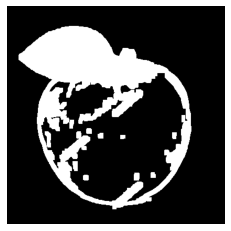

In [71]:
#Esta función recibe una imagen y genera la máscara através de detección de bordes
def mask_edge(img):
    #Detección inicial de bordes
    edges2 = pcv.canny_edge_detect(img=img, high_thresh=60, low_thresh =40, sigma=1)
    
    #cierre de bordes
    radius = 2
    selem = morph.disk(radius)
    cierre = morph.binary_closing(edges2,selem)
    
    #dilatacion
    elem1 = morph.rectangle(3,3)
    elem2 = morph.disk(3)
    
    dilatacionx1 = morph.binary_dilation(cierre,elem1)
    dilatacionx2 = morph.binary_dilation(dilatacionx1,elem1)
    dilatacionx3 = morph.binary_dilation(dilatacionx2,elem1)
    dilatacionx4 = morph.binary_dilation(dilatacionx3,elem1)
    dilatacionx5 = morph.binary_dilation(dilatacionx4,elem1)
    dilatacionx6 = morph.binary_dilation(dilatacionx5,elem1)
    dilatacionx7 = morph.binary_dilation(dilatacionx6,elem1)
    dilatacionx8 = morph.binary_dilation(dilatacionx7,elem1)
    dilatacionx9 = morph.binary_dilation(dilatacionx8,elem1)
    
    #cierre = cierre > 128
    filled = morph.remove_small_holes(dilatacionx3,area_threshold=8000) #min_size es el area en pixeles de los huecos a rellenar

    return filled

plot(mask_edge(img_test)*255)

Luego se desarrolla una máscara a partir de los resultados de binarización.

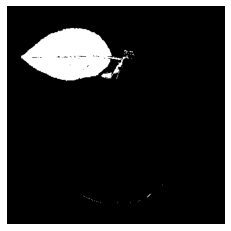

In [72]:
def mask_binary(img):
    binary = img.copy()
    binary = removeLesses(binary,110) #Removemos los colores negros
    binary = binaryChannels(binary, 179, 105, 113, mayorG= True) #Binarizamos
    ret,binary = cv2.threshold(binary,150,255,cv2.THRESH_BINARY_INV)
    return binary

binarizada = mask_binary(img_test)
plot(binarizada)

Finalmente se aplican transformaciones morfológicas para mejorar los resultados de la binarización. Las operaciones estándar empleadas son erosión, diatación y cierre.

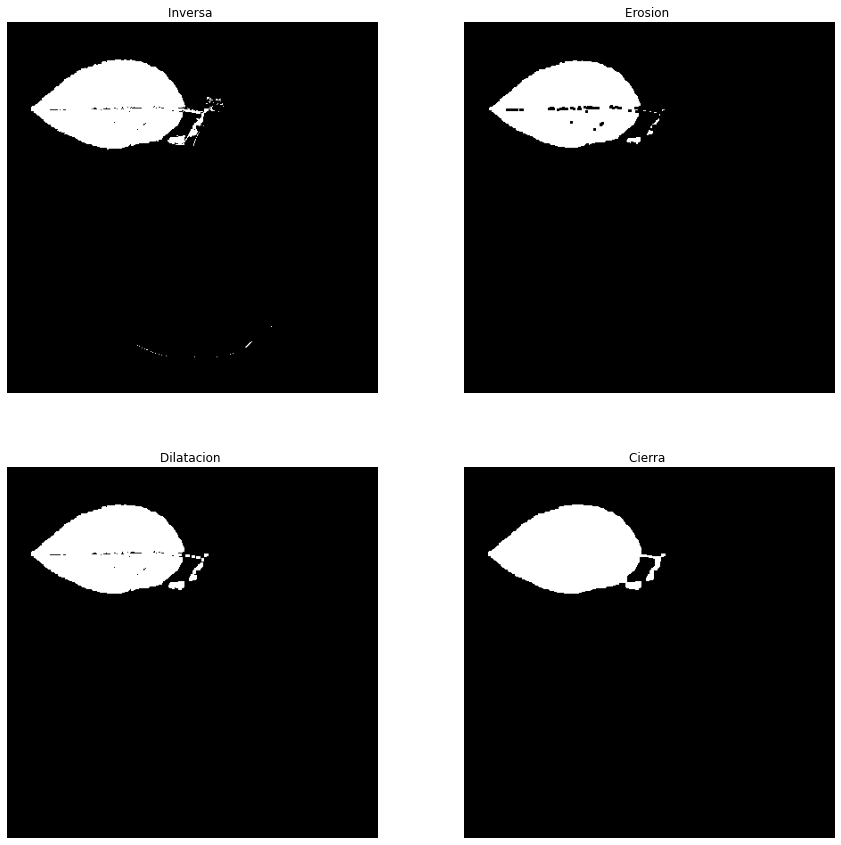

In [73]:
kernel = np.ones((3,3),np.uint8)
kernel2 = np.ones((7,7),np.uint8)
ret,thresh1 = cv2.threshold(binarizada,150,255,cv2.THRESH_BINARY)
morph_erosion = cv2.erode(thresh1,kernel,iterations = 1)
morph_dilation = cv2.dilate(morph_erosion,kernel,iterations = 1)
morph_closing = cv2.morphologyEx(morph_dilation, cv2.MORPH_CLOSE, kernel2)
plt.figure(figsize=(15,15))
plot(thresh1,subplot = (2,2,1), title= 'Inversa ')
plot(morph_erosion,subplot = (2,2,2), title= 'Erosion ')
plot(morph_dilation,subplot = (2,2,3), title= 'Dilatacion ')
plot(morph_closing,subplot = (2,2,4), title= 'Cierra ')

Se desarrolla una función que permite aplicar una máscara a una imagen RGB

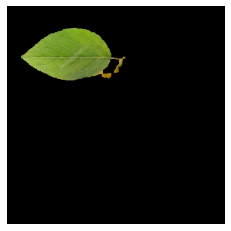

In [74]:
def maskRGB(img, mask):
    R = np.dot(img,abc_r)
    G = np.dot(img,abc_g)
    B = np.dot(img,abc_b)

    final = np.zeros((len(R),len(R[0]),3), 'uint8')
    final[..., 0] = R*(mask/mask.max())
    final[..., 1] = G*(mask/mask.max())
    final[..., 2] = B*(mask/mask.max())
    
    return final

plot(maskRGB(img_test, morph_closing))